# Centre Commercial

## EDA

In [2]:
import pandas as pd
import numpy as np

In [3]:
df_mall= pd.read_csv("Mall_Customers.csv")
df_mall

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df_mall['Spending Score (1-100)'].isnull().values.any()

False

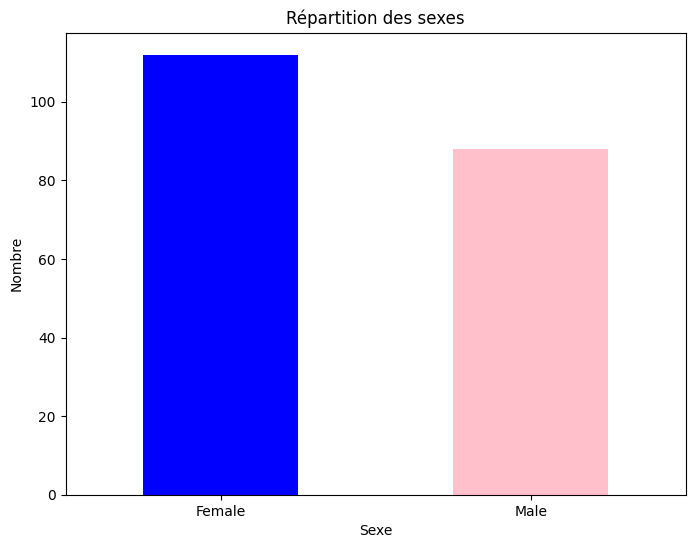

In [5]:
import pandas as pd
import matplotlib.pyplot as plt


gender = df_mall.Gender.value_counts()

# graphique en barres
plt.figure(figsize=(8, 6))
gender.plot(kind='bar', color=['blue', 'pink'])
plt.title('Répartition des sexes')
plt.xlabel('Sexe')
plt.ylabel('Nombre')
plt.xticks(rotation=0)
plt.show()

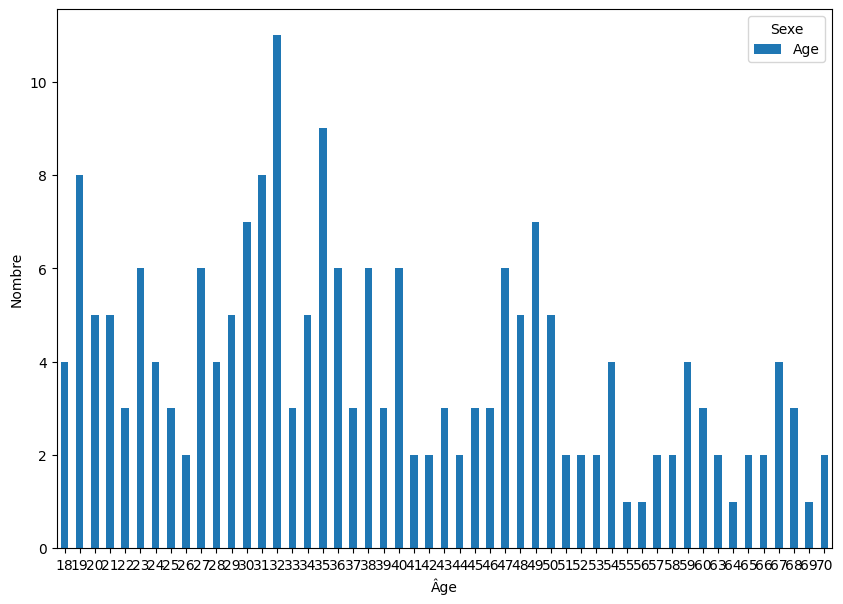

In [6]:
# Grouper par sexe et âge et compter les occurrences
age_counts = df_mall['Age'].value_counts().sort_index()

# Créer le graphique en barres
age_counts.plot(kind='bar', figsize=(10, 7), stacked=True)
plt.title('')
plt.xlabel('Âge')
plt.ylabel('Nombre')
plt.legend(title='Sexe')
plt.xticks(rotation=0)
plt.show()

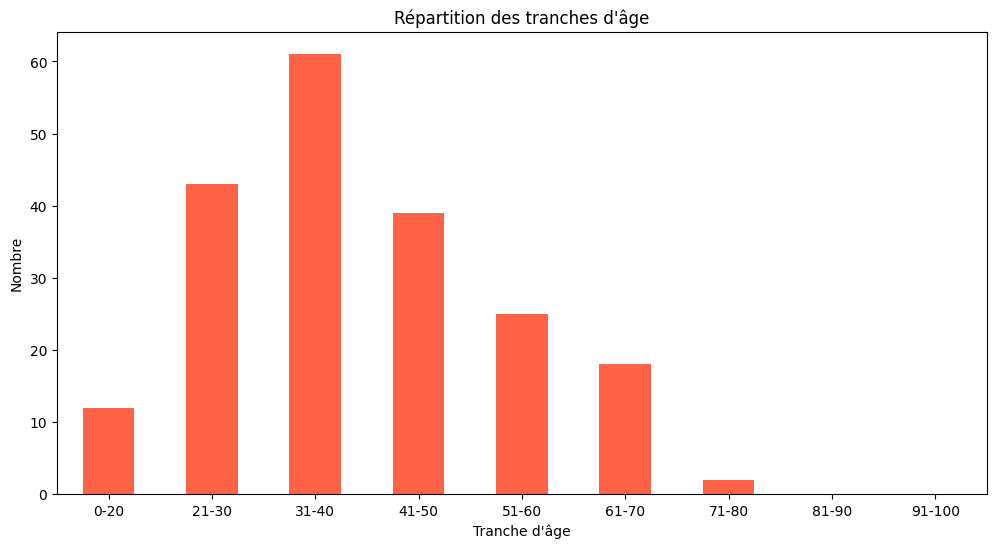

In [7]:
# Créer des tranches d'âge
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
df_mall['Tranche d\'âge'] = pd.cut(df_mall['Age'], bins=bins, labels=labels, right=False)

# Compter le nombre d'occurrences dans chaque tranche d'âge
age_group_counts = df_mall['Tranche d\'âge'].value_counts().sort_index()

#colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FFD700', '#FF6347', '#7FFFD4', '#DDA0DD', '#FF4500']

# Créer le graphique en barres
plt.figure(figsize=(12, 6))
age_group_counts.plot(kind='bar', color='#FF6347')
plt.title('Répartition des tranches d\'âge')
plt.xlabel('Tranche d\'âge')
plt.ylabel('Nombre')
plt.xticks(rotation=0)
plt.show()

In [25]:
# Mediane des revenu
df_mall["Age"].max()

70

In [9]:
# Moyenne des revenu
df_mall["Annual Income (k$)"].max()

137

In [10]:
df_mall["Age"].min()

18

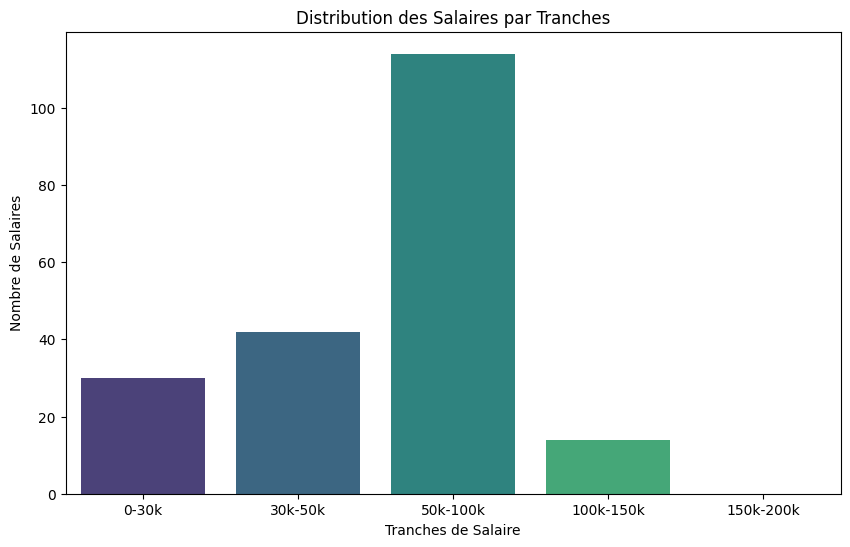

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Définir les bornes des tranches de salaire
bins = [0, 30, 50, 100, 150, 200]
labels = ['0-30k', '30k-50k', '50k-100k', '100k-150k', '150k-200k']

# Créer une nouvelle colonne avec les tranches de salaire
df_mall['Income Bin'] = pd.cut(df_mall['Annual Income (k$)'], bins=bins, labels=labels, right=False)

# Compter le nombre de salaires dans chaque tranche
salary_counts = df_mall['Income Bin'].value_counts().sort_index()

# Créer le graphique en barres
plt.figure(figsize=(10, 6))
sns.barplot(x=salary_counts.index, y=salary_counts.values, palette='viridis')
plt.title('Distribution des Salaires par Tranches')
plt.xlabel('Tranches de Salaire')
plt.ylabel('Nombre de Salaires')
plt.show()


/tmp/ipykernel_1092/2783024789.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df_mall.corr(), dtype=np.bool))


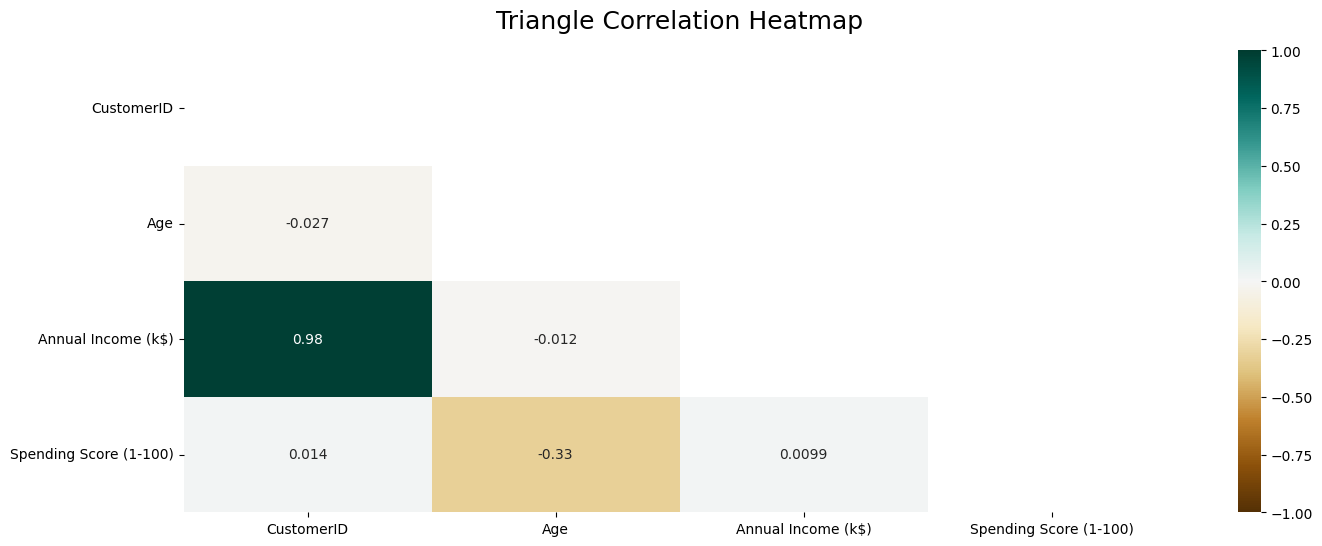

In [12]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df_mall.corr(), dtype=np.bool))
heatmap = sns.heatmap(df_mall.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [13]:
df_mall

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Tranche d'âge,Income Bin
0,1,Male,19,15,39,0-20,0-30k
1,2,Male,21,15,81,21-30,0-30k
2,3,Female,20,16,6,21-30,0-30k
3,4,Female,23,16,77,21-30,0-30k
4,5,Female,31,17,40,31-40,0-30k
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,31-40,100k-150k
196,197,Female,45,126,28,41-50,100k-150k
197,198,Male,32,126,74,31-40,100k-150k
198,199,Male,32,137,18,31-40,100k-150k


## Clustering

In [14]:
x = df_mall['Annual Income (k$)']
y = df_mall['Spending Score (1-100)']

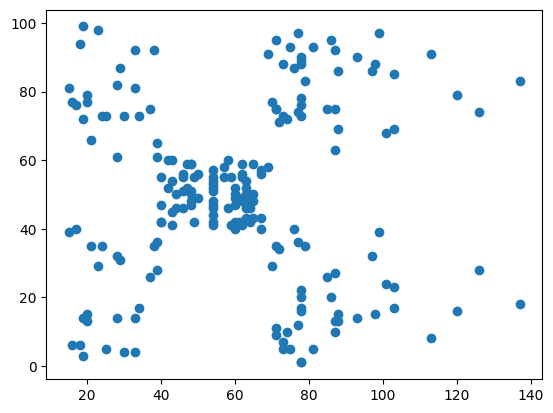

/home/ryad/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/ryad/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/ryad/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/ryad/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/

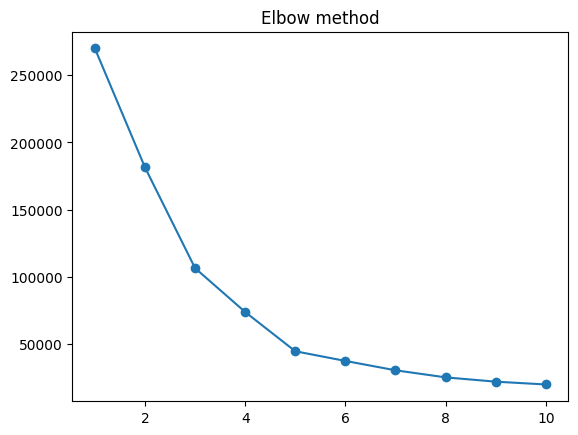

In [15]:
from sklearn.cluster import KMeans

plt.scatter(x, y)
plt.show()

data = list(zip(x, y))
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.show()

/home/ryad/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


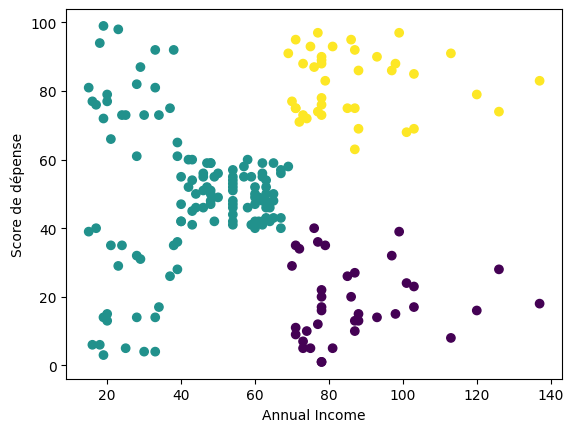

In [16]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)

plt.scatter(x, y, c=kmeans.labels_)
plt.xlabel('Annual Income')
plt.ylabel('Score de dépense')
plt.show()

In [17]:
#importer les packages kmeans
from sklearn.cluster  import KMeans
from sklearn.preprocessing import StandardScaler

In [18]:
dfa=df_mall[['Age',"Annual Income (k$)"]]
dfa

,Age,Annual Income (k$)
0,19,15
1,21,15
2,20,16
3,23,16
4,31,17
...,...,...
195,35,120
196,45,126
197,32,126
198,32,137


In [19]:
#standardiser les données
scdfa=StandardScaler()
dfa_std=scdfa.fit_transform(dfa.astype(float))
dfa_std

array([[-1.42456879, -1.73899919],
       [-1.28103541, -1.73899919],
       [-1.3528021 , -1.70082976],
       [-1.13750203, -1.70082976],
       [-0.56336851, -1.66266033],
       [-1.20926872, -1.66266033],
       [-0.27630176, -1.62449091],
       [-1.13750203, -1.62449091],
       [ 1.80493225, -1.58632148],
       [-0.6351352 , -1.58632148],
       [ 2.02023231, -1.58632148],
       [-0.27630176, -1.58632148],
       [ 1.37433211, -1.54815205],
       [-1.06573534, -1.54815205],
       [-0.13276838, -1.54815205],
       [-1.20926872, -1.54815205],
       [-0.27630176, -1.50998262],
       [-1.3528021 , -1.50998262],
       [ 0.94373197, -1.43364376],
       [-0.27630176, -1.43364376],
       [-0.27630176, -1.39547433],
       [-0.99396865, -1.39547433],
       [ 0.51313183, -1.3573049 ],
       [-0.56336851, -1.3573049 ],
       [ 1.08726535, -1.24279661],
       [-0.70690189, -1.24279661],
       [ 0.44136514, -1.24279661],
       [-0.27630176, -1.24279661],
       [ 0.08253169,

/home/ryad/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/ryad/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/ryad/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/ryad/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/

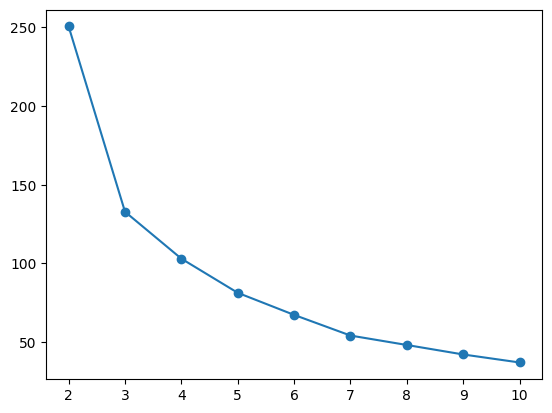

In [20]:
#Appliquer kmeans
cluster_range=[2,3,4,5,6,7,8,9,10]
inertie=[]

for c in cluster_range:
    kmeans=KMeans(init='k-means++',n_clusters=c).fit(dfa_std)
    inertie.append(kmeans.inertia_)
    
#print(inertie)

#dessiner les inerties calculé
plt.Figure()
plt.plot(cluster_range,inertie,marker='o')
plt.show()

In [21]:
#On part sur 3 clusters
kmeans=KMeans(n_clusters=3).fit(dfa_std)

#affecter les cluster à la varialb e labels
labels=kmeans.labels_

#créer un dataset qui contient les valeurs de dfa_std
new_dfa=pd.DataFrame(data=dfa_std,columns=['age','revenu_annuel'])

#rajouter les labels à mon dataset dfa_std
new_dfa['labels_kmeans']=labels

new_dfa

/home/ryad/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,age,revenu_annuel,labels_kmeans
0,-1.424569,-1.738999,0
1,-1.281035,-1.738999,0
2,-1.352802,-1.700830,0
3,-1.137502,-1.700830,0
4,-0.563369,-1.662660,0
...,...,...,...
195,-0.276302,2.268791,2
196,0.441365,2.497807,2
197,-0.491602,2.497807,2
198,-0.491602,2.917671,2


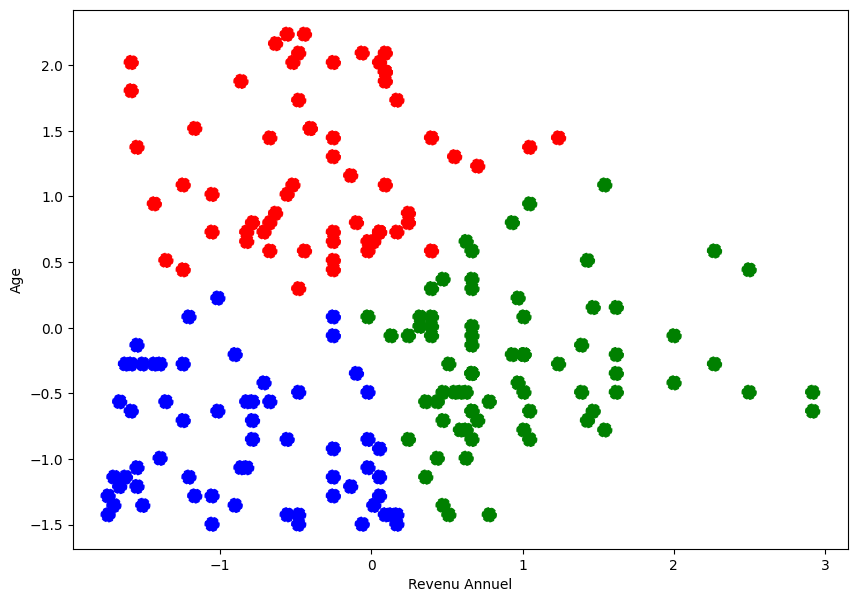

In [22]:
#visualiser les cluster en 2dimesions
fig,ax=plt.subplots(figsize=[10,7])
plt.scatter(new_dfa['revenu_annuel'][new_dfa['labels_kmeans']==0],new_dfa['age'][new_dfa['labels_kmeans']==0],
            color='blue',s=100,linestyle='--')
plt.scatter(new_dfa['revenu_annuel'][new_dfa['labels_kmeans']==1],new_dfa['age'][new_dfa['labels_kmeans']==1],
            color='red',s=100,linestyle='--')
plt.scatter(new_dfa['revenu_annuel'][new_dfa['labels_kmeans']==2],new_dfa['age'][new_dfa['labels_kmeans']==2],
            color='green',s=100,linestyle='--')

plt.xlabel('Revenu Annuel')
plt.ylabel('Age')
plt.show()